# Project 2

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.rcParams['figure.figsize'] = [20, 5]

In [131]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### CO2 from 800kyrs to present

In [132]:
co2df=pd.read_csv('correctedantarctica2015co2.csv', skiprows=14, usecols=[0,1,2,])


In [133]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04
...,...,...,...
1896,803925.28,202.92,2.06
1897,804009.87,207.50,0.92
1898,804522.67,204.86,1.64
1899,805132.44,202.23,0.69


In [134]:
co2df['year_co2'] = co2df['Gasage (yr BP)'].apply(lambda x: -x)

In [135]:
co2df['year_co2'] = co2df['year_co2'].astype(int)

In [136]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv),year_co2
0,-51.03,368.02,0.06,51
1,-48.00,361.78,0.37,48
2,-46.28,359.65,0.10,46
3,-44.41,357.11,0.16,44
4,-43.08,353.95,0.04,43
...,...,...,...,...
1896,803925.28,202.92,2.06,-803925
1897,804009.87,207.50,0.92,-804009
1898,804522.67,204.86,1.64,-804522
1899,805132.44,202.23,0.69,-805132


[Text(0.5, 1.0, 'Corrected Composite CO2 800kyrs to Present')]

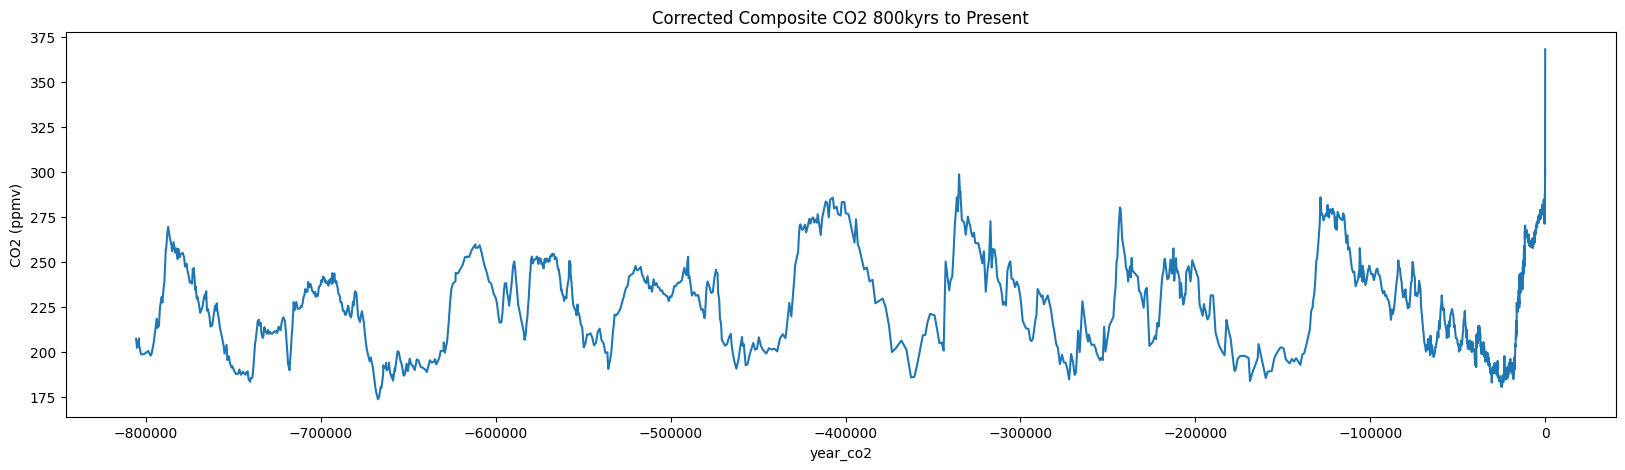

In [137]:
sns.lineplot(data=co2df, x='year_co2', y='CO2 (ppmv)').set(title='Corrected Composite CO2 800kyrs to Present')

In [138]:
tempdf=pd.read_csv('temperaturedata.csv')

In [139]:
tempdf

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


In [140]:
tempdf['year_temp'] = tempdf['EDC3béta'].apply(lambda x: -x)

In [141]:
tempdf

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,year_temp
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,50.00000
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,43.55977
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,37.44019
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,31.64156
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,24.55278
...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-816871.60000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-817693.60000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-818505.50000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-819303.10000


[Text(0.5, 1.0, 'Temperature 800kyrs to Present')]

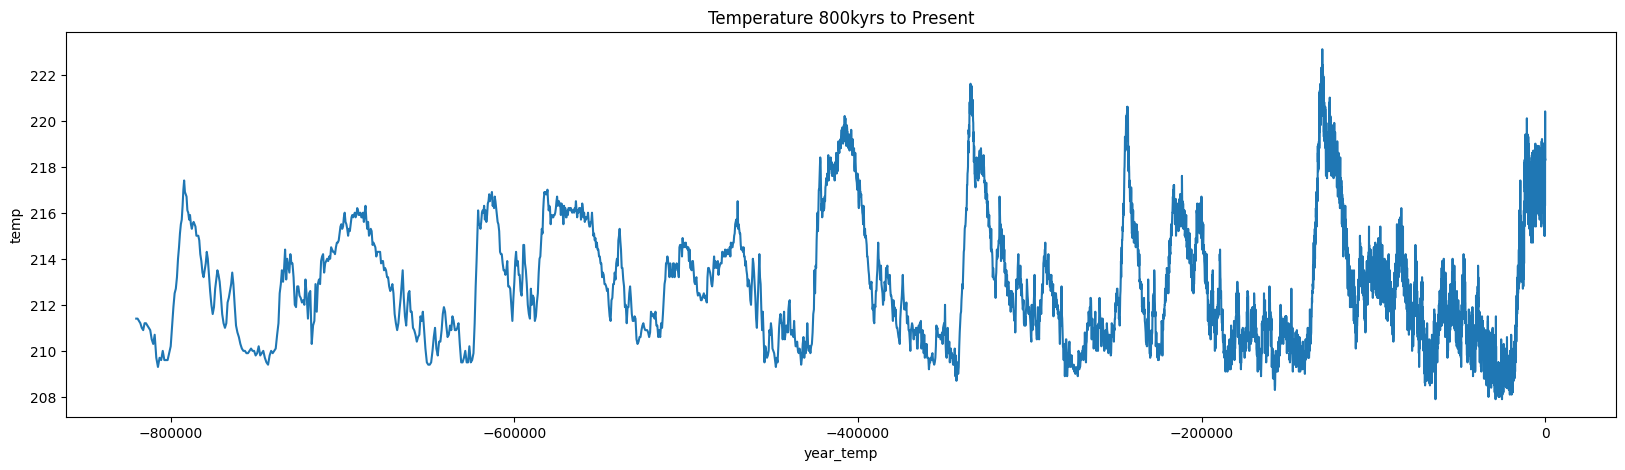

In [142]:
sns.lineplot(data=tempdf, x='year_temp', y='temp').set(title='Temperature 800kyrs to Present')


In [143]:
year_co2 = co2df[['year_co2','CO2 (ppmv)']]
year_temp = tempdf[['year_temp','temp']]

In [144]:
co2andtemp = pd.concat([year_co2, year_temp], axis =1)

In [145]:
co2andtemp

,year_co2,CO2 (ppmv),year_temp,temp
0,51.0,368.02,50.00000,218.3
1,48.0,361.78,43.55977,218.3
2,46.0,359.65,37.44019,218.3
3,44.0,357.11,31.64156,218.3
4,43.0,353.95,24.55278,218.3
...,...,...,...,...
5814,NaN,NaN,-816871.60000,211.0
5815,NaN,NaN,-817693.60000,211.2
5816,NaN,NaN,-818505.50000,211.3
5817,NaN,NaN,-819303.10000,211.4


In [146]:
co2andtemp.dtypes

year_co2      float64
CO2 (ppmv)    float64
year_temp     float64
temp          float64
dtype: object

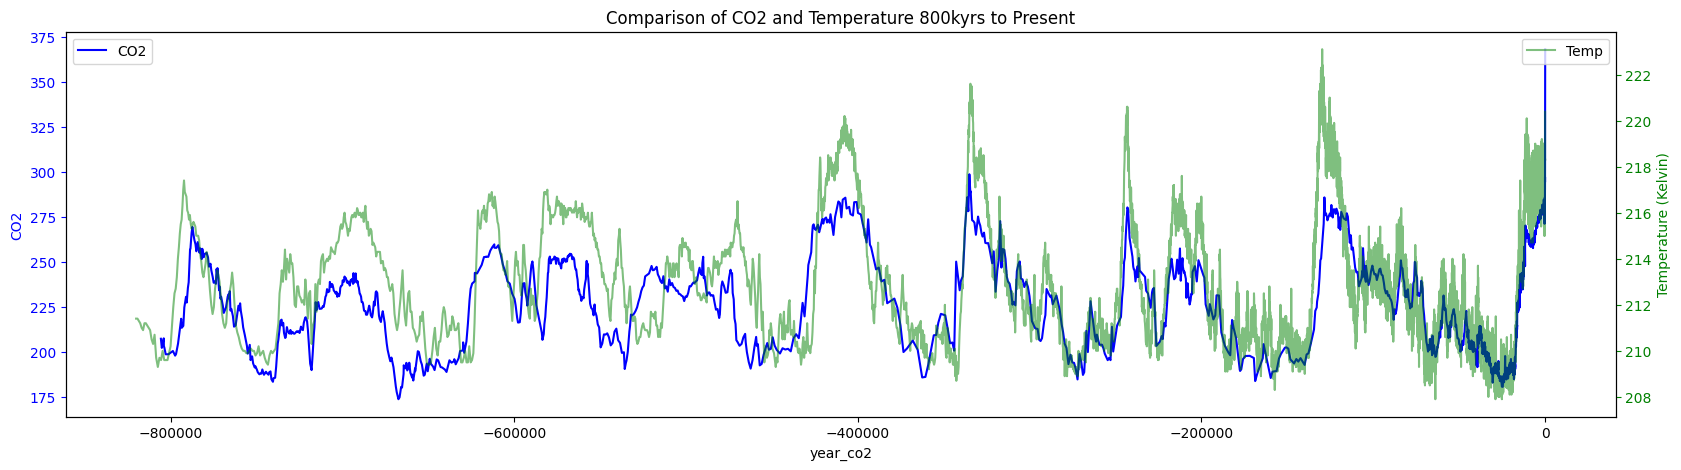

In [147]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2andtemp['year_co2'], co2andtemp['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(co2andtemp['year_temp'], co2andtemp['temp'], label='Temp', color='green',alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of CO2 and Temperature 800kyrs to Present')

# Display the plot
plt.show()

In [148]:
# Read the content of the file
with open('Methane CH4 800kyrs to present.txt', 'r') as file:
    lines = file.readlines()

# Process each line and add commas
lines_with_commas = []
for line in lines:
    columns = line.strip().split()  # Assuming columns are separated by spaces
    line_with_commas = ','.join(columns) + '\n'
    lines_with_commas.append(line_with_commas)

# Write the modified content back to the file
with open('Methane CH4 800kyrs to present.csv', 'w') as file:
    file.writelines(lines_with_commas)

In [149]:
ch4df=pd.read_csv('Methane CH4 800kyrs to present.csv')
ch4df

,Depth,GasAge,CH4mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [150]:
ch4df['year_CH4'] = ch4df['GasAge'].apply(lambda x: -x)

[Text(0.5, 1.0, 'Methane Trend 800kyrs to Present')]

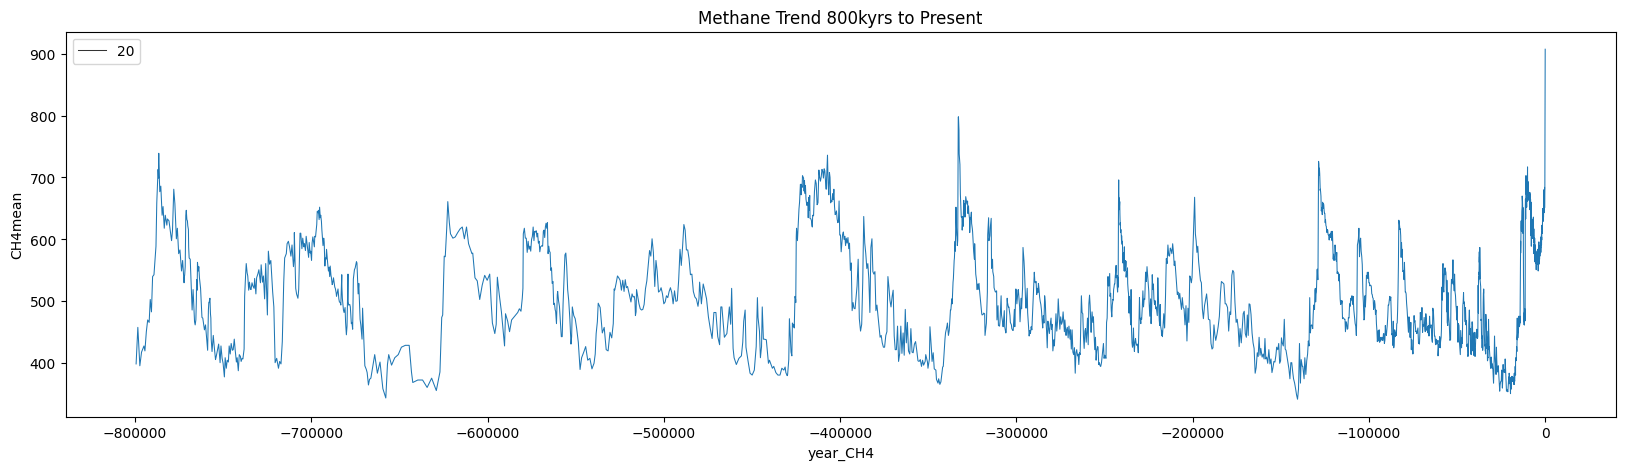

In [151]:
sns.lineplot(data=ch4df, x='year_CH4', y='CH4mean',size=20).set(title='Methane Trend 800kyrs to Present')

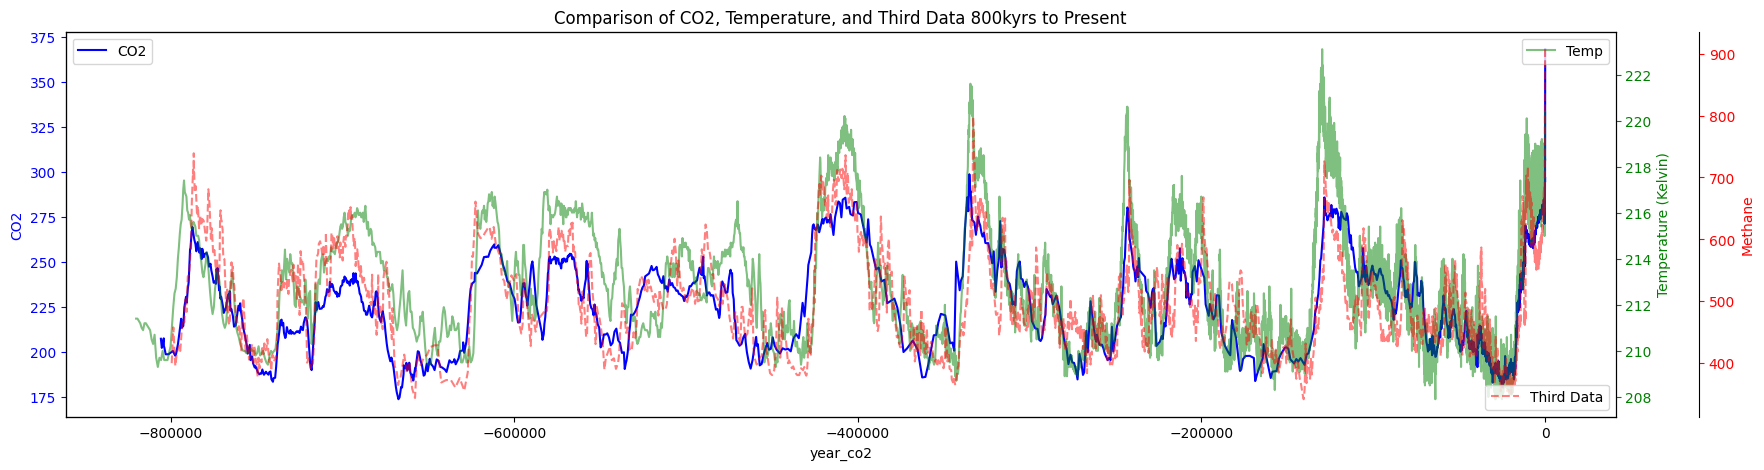

In [152]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2andtemp['year_co2'], co2andtemp['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(co2andtemp['year_temp'], co2andtemp['temp'], label='Temp', color='green', alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third set of data on the third y-axis
ax3.plot(ch4df['year_CH4'], ch4df['CH4mean'], label='Third Data', color='red', linestyle='dashed', alpha=0.5)
ax3.set_ylabel('Methane', color='red')
ax3.tick_params('y', colors='red')

# Move the spine of the third y-axis to the right to avoid overlapping
ax3.spines['right'].set_position(('outward', 60))

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# Add title
plt.title('Comparison of CO2, Temperature, and Third Data 800kyrs to Present')

# Display the plot
plt.show()

In [153]:
year_ch4 = ch4df[['GasAge','CH4mean']]

### Irish Data

In [161]:
ire_df = pd.read_csv("https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip")

In [162]:
ire_df['Date'] = pd.to_datetime(ire_df['Year'].astype(str) + ire_df['Month'].astype(str), format='%Y%m')

In [163]:
ire_df

,Year,Month,Median montly series,Date
0,1711,1,16.4,1711-01-01
1,1711,2,73.1,1711-02-01
2,1711,3,121.2,1711-03-01
3,1711,4,85.2,1711-04-01
4,1711,5,66.6,1711-05-01
...,...,...,...,...
3667,2016,8,79.1,2016-08-01
3668,2016,9,108.1,2016-09-01
3669,2016,10,51.8,2016-10-01
3670,2016,11,58.0,2016-11-01


<Axes: xlabel='Date', ylabel='Median montly series'>

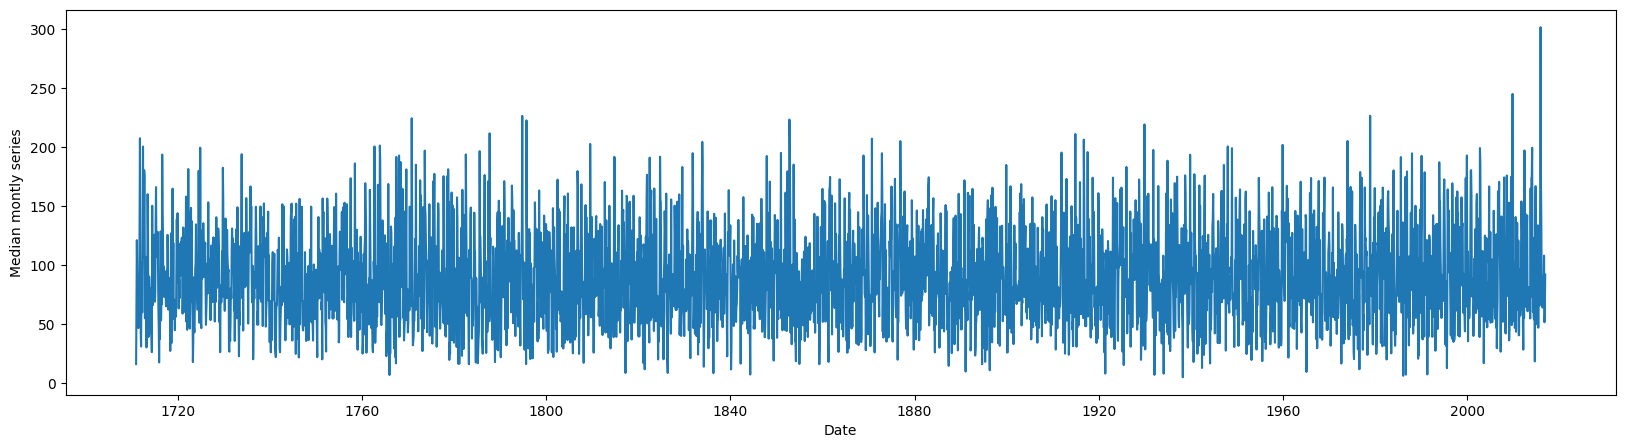

In [174]:
sns.lineplot(data=ire_df, x='Date', y='Median montly series' )

In [168]:
mayo_rain_df=pd.read_csv('Mayo_Rainfall.csv', skiprows=19)

In [169]:
mayo_rain_df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1956,9,,,,,,49.9,,6.4,62,47.8
1,1956,10,10.3,17.1,1.2,13.3,7.4,98.8,-1.3,12.4,58,97.1
2,1956,11,8.5,14,-0.6,10.8,6.2,51.6,-2.6,13.3,72,45.4
3,1956,12,7.5,13.1,1.3,9.9,5.2,180.6,-0.6,16.6,81,28.6
4,1957,1,6.5,13.2,-1.7,9.1,3.9,148.5,-3.3,15.4,94,56.3
...,...,...,...,...,...,...,...,...,...,...,...,...
797,2023,7,14.9,21.9,9.8,17.4,12.4,148.5,7.2,11.0,47,
798,2023,8,15.7,23.2,10.5,18.3,13.1,117.2,9.1,11.0,42,
799,2023,9,14.8,26.2,7.1,17.9,11.8,77.2,4.5,10.8,48,
800,2023,10,11.7,17.6,3.1,14.3,9.2,100.0,-0.4,10.3,42,


In [178]:
mayo_rain_df['Date'] = pd.to_datetime(mayo_rain_df['year'].astype(str) + mayo_rain_df['month'].astype(str), format='%Y%m')

In [179]:
mayo_rain_df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Date
0,1956,9,,,,,,49.9,,6.4,62,47.8,1956-09-01
1,1956,10,10.3,17.1,1.2,13.3,7.4,98.8,-1.3,12.4,58,97.1,1956-10-01
2,1956,11,8.5,14,-0.6,10.8,6.2,51.6,-2.6,13.3,72,45.4,1956-11-01
3,1956,12,7.5,13.1,1.3,9.9,5.2,180.6,-0.6,16.6,81,28.6,1956-12-01
4,1957,1,6.5,13.2,-1.7,9.1,3.9,148.5,-3.3,15.4,94,56.3,1957-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2023,7,14.9,21.9,9.8,17.4,12.4,148.5,7.2,11.0,47,,2023-07-01
798,2023,8,15.7,23.2,10.5,18.3,13.1,117.2,9.1,11.0,42,,2023-08-01
799,2023,9,14.8,26.2,7.1,17.9,11.8,77.2,4.5,10.8,48,,2023-09-01
800,2023,10,11.7,17.6,3.1,14.3,9.2,100.0,-0.4,10.3,42,,2023-10-01


<Axes: xlabel='Date', ylabel='rain'>

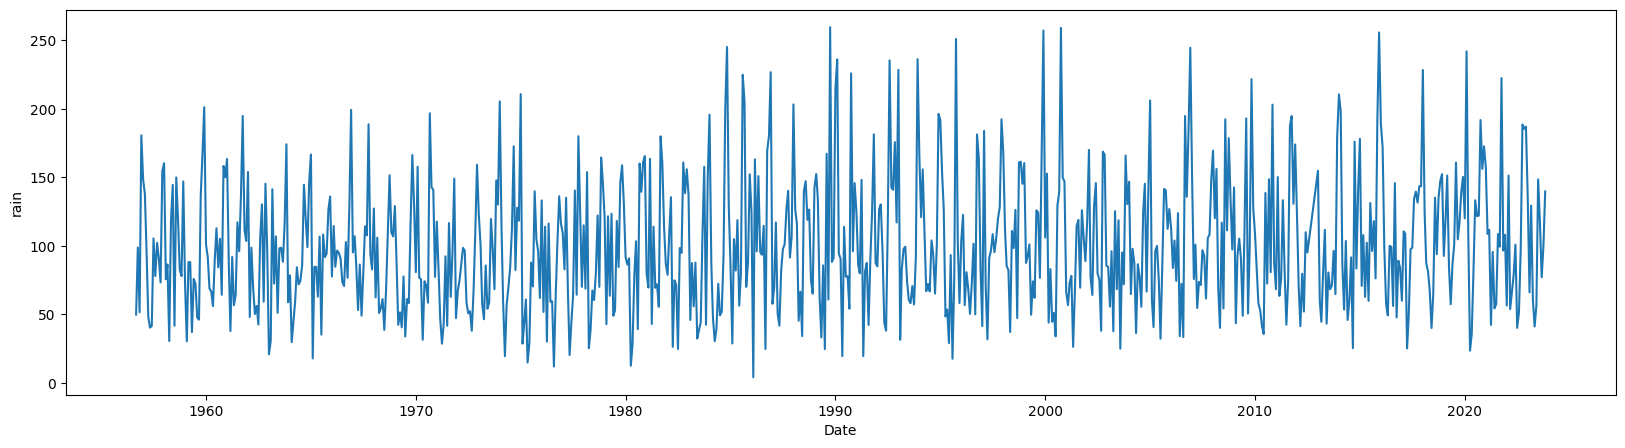

In [180]:
sns.lineplot(data=mayo_rain_df, x='Date', y='rain' )

<Axes: ylabel='rain'>

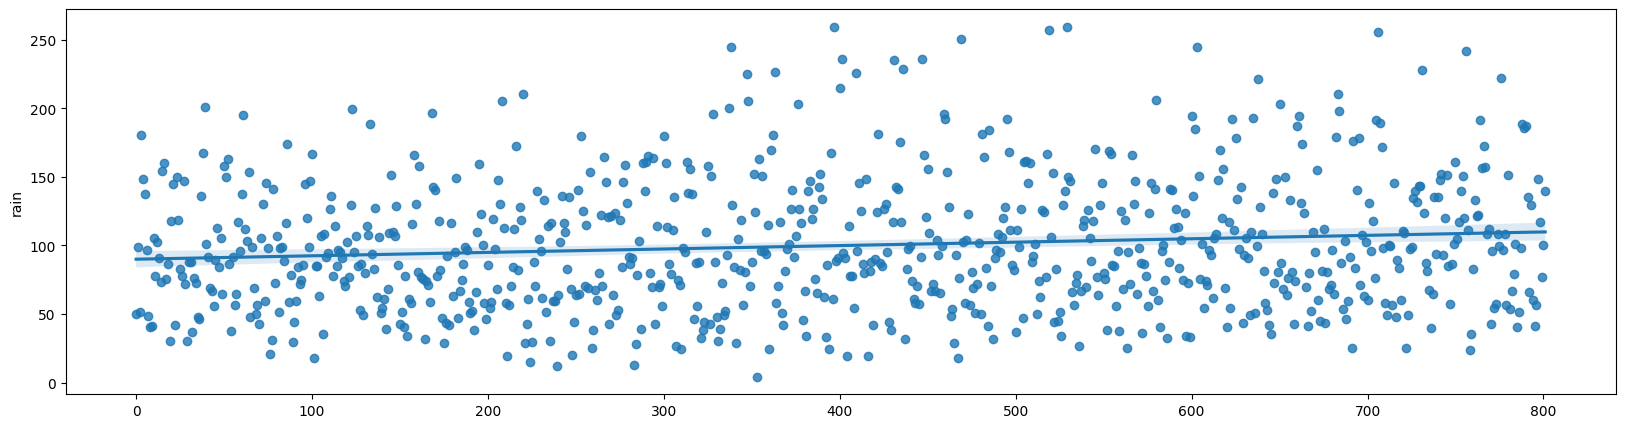

In [182]:
sns.regplot(x=mayo_rain_df.index, y="rain", data=mayo_rain_df)

### Combining Data Sets

In [185]:
combined = pd.concat([co2andtemp, year_ch4, mayo_rain_df], axis =1)

In [186]:
combined

,year_co2,CO2 (ppmv),year_temp,temp,GasAge,CH4mean,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Date
0,51.0,368.02,50.00000,218.3,13.0,907.0,1956.0,9.0,,,,,,49.9,,6.4,62,47.8,1956-09-01
1,48.0,361.78,43.55977,218.3,126.0,784.0,1956.0,10.0,10.3,17.1,1.2,13.3,7.4,98.8,-1.3,12.4,58,97.1,1956-10-01
2,46.0,359.65,37.44019,218.3,130.0,762.0,1956.0,11.0,8.5,14,-0.6,10.8,6.2,51.6,-2.6,13.3,72,45.4,1956-11-01
3,44.0,357.11,31.64156,218.3,151.0,710.0,1956.0,12.0,7.5,13.1,1.3,9.9,5.2,180.6,-0.6,16.6,81,28.6,1956-12-01
4,43.0,353.95,24.55278,218.3,184.0,727.0,1957.0,1.0,6.5,13.2,-1.7,9.1,3.9,148.5,-3.3,15.4,94,56.3,1957-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,NaN,NaN,-816871.60000,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5815,NaN,NaN,-817693.60000,211.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5816,NaN,NaN,-818505.50000,211.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5817,NaN,NaN,-819303.10000,211.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [159]:
combined.to_csv('combined_data.csv', index=False) 

In [160]:
combined.to_json('combined_data.json', orient='records') 

### References

[1] pandas.pydata.org. (n.d.). pandas.DataFrame.apply — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html. [Accessed 20 Dec. 2023].

[2] Marsja, E. (2023). Combine Year and Month Columns in Pandas. [online] Erik Marsja. Available at: https://www.marsja.se/combine-year-and-month-columns-in-pandas/ [Accessed 20 Dec. 2023].‌

[3] Stack Overflow. (n.d.). python - How to change the figure size of a seaborn axes or figure level plot. [online] Available at: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot. [Accessed 20 Dec. 2023].

[4] matplotlib.org. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html. [Accessed 20 Dec. 2023]

[6] Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer, J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter, F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, J.L. Tison, M. Werner, and E.W. Wolff.  2007. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years. Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

[7] Loulergue, L., A. Schilt, R. Spahni, V. Masson-Delmotte, T. Blunier, B. Lemieux, J.-M. Barnola, D. Raynaud, T.F. Stocker, and J. Chappellaz. 2008. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature, Vol. 453, pp. 383-386, 15 May 2008. doi:10.1038/nature06950. Noaa.gov. (2013). Available at: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt [Accessed 20 Dec. 2023]. ‌

[8] Stack Overflow. (n.d.). python - How to make inline plots in Jupyter Notebook larger? [online] Available at: https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger. [Accessed 21 Dec. 2023]. 

‌

pandas.pydata.org. (n.d.). pandas.DataFrame.astype — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html. [Accessed 21 Dec. 2023]. 

‌

Fusio.net. (2023). Available at: https://cli.fusio.net/cli/climate_data/webdata/mly2375.zip [Accessed 21 Dec. 2023].

‌